<center> <h1>  Lab1: Introduction to probabilistic graphical models </h1> </center>

<center> <h3> Done by : Siwar ABBES </h3> </center>

### Imports :

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
from random import randint

## Question 0

***We have to derive it mathematically and explain why it works***



$s = log\sum_{i=1}^{I} exp(v_i) $, where each $v_i$ < 0 and $|v_i|$ is very large $\forall i \in \{1..I\} $ </br> 


<br>

Let $V_{max}= max_i(v_i)$ so :

$$
\log(\sum_{i=1}^{I} \exp{v_i} )=\log(\sum_{i=1}^{I} \exp({v_i+v_{max}-v_{max}}))
$$
$$
=\log(\sum_{i=1}^{I} \exp({v_i-v_{max}})\exp(v_{max}))
$$
$$
=v_{max}+\log(\sum_{i=1}^{I} \exp({v_i-v_{max}}))
$$

Let $V_{i_0}=V_{max}$, then:
$$\log(\sum_{i=1}^{I} \exp{v_i}) =v_{max}+\log(1+\sum_{i=1,i\ne i_0}^{I} \exp({v_i-v_{max}}))$$

we can see that:  $1+\sum_{i=1,i\ne i_0}^{I} \exp({v_i-v_{max}}) > 1$
then : $\sum_{i=1}^{I} \exp{v_i}>V_{max}$ and that's why it should work.
    


In [2]:
def log_sum_exp(v):
    """
    v : a vector of v_i values
    """
    v_max=max(v)
    return v_max+np.log(np.sum(np.exp(v-v_max)))

In [3]:
# Testing the function on some values
v=np.array([-1234,-1235])
print("The value obtained is  "+str(log_sum_exp(v)))

The value obtained is  -1233.6867383124818


**Remark :**

In [4]:
np.log(np.sum(np.exp(v)))

/Users/siwarabbes/anaconda3/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


-inf


We can see that with applying the classical functions with numpy, we obtain $-\infty$ which is wrong.



## Question 1

A robot is moving across a circular corridor. We assume that the possible positions of the robot is a discrete set with
N locations. The initial position of the robot is unknown and assumed to be uniformly distributed. At each step k,
the robot stays where it is with probability , or moves to the next point in counter-clock direction with probability
1 − . At each step k, the robot can observe its true position with probability w. With probability 1 − w, the position
sensor fails and gives a measurement that is independent from the true position (uniformly distributed).

###  1. Choose the appropriate random variables, define their domains, write down the generative model and draw the associated directed graphical model


  Let's denote by N the number of robot positions</p> 
    <p>
  For this problem we are going to define two random variables:</p> 
    <p>
    $\bullet  $$ X_{k} $:Position of the robot : $\hspace{0.15cm}$ $ X_k \sim p(X_k|X_{k-1})$ $\hspace{0.1cm}$ 
    </p>
    <p>
    $X_{k} \in \{1,,N\}$ <br>
    </p>
     <p>
    $\bullet$$ Y_{k} $: The Observations : $\hspace{0.5cm}$ $ Y_k \sim p(Y_k|X_{k})$ $\hspace{0.5cm}$ </br>
   <p>
    $Y_{k} \in \{1,,N\}$   <br>
     </p>
     
  
   <p>
  So we have : <br>
    -  <b> Observation Model </b> : $ P \left( Y_k \vert X_k \right)  $ :  <br>
    $$ p\left(y_k  \vert  x_k\right)  = w  *   \delta( y_k - x_k) + (1-w) * \mathcal{U}({1..N})$$
       </p>
  <br>  <p>
- <b> Transition Model </b> : $ P \left( X_k \vert X_{k-1} \right) $:  <br>
              $X_k = X_{k-1}$ with probability = $\epsilon $ <br>
                $X_k \neq X_{k-1}$ with probability = 1 - $\epsilon $
    </p>
     
   <p> <br>
- <b> Generative Model : </b> $ P \left( X_k \vert Y_k \right)$
   </p>
     


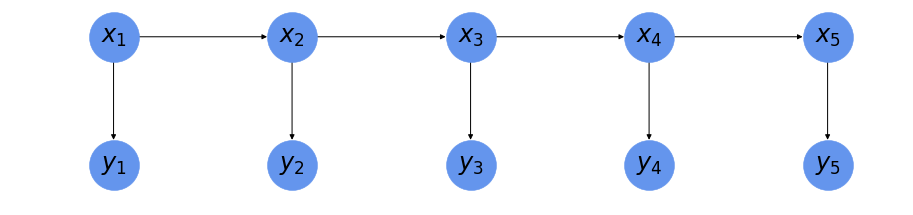

In [5]:
def Draw_HMM(inter, intra, T, labels):
    """Unfold a graph for T time slices"""
    N = max(max([i for i,j in inter]),max([j for i,j in inter]))+1

    G = np.zeros((N*T,N*T))
    pos = []
    all_labels = []
    for n in range(N):
        pos.append((0,-n))
        all_labels.append('$'+labels[n]+'_{'+str(0+1)+"}"+'$')
        
    for e in inter:
        s,d = e
        G[s,d] = 1

    for t in range(1,T):
        for n in range(N):
            pos.append((t,-n))
            all_labels.append('$'+labels[n]+'_{'+str(t+1)+"}"+'$')

        for e in inter:
            s,d = e
            s = s + N*t
            d = d + N*t
            G[s,d] = 1
        
        for e in intra:
            s,d = e
            s = s + N*(t-1)
            d = d + N*t
            G[s,d] = 1
    return G,pos,all_labels


inter = [(0,1)]
intra = [(0,0)]
variable_names = ["x", "y"] 
T = 5

A, pos, label_list = Draw_HMM(inter, intra, T, variable_names)

G = nx.DiGraph(A)
labels = {i: s for i,s in enumerate(label_list)}
plt.figure(figsize=(12,2.5))
nx.draw(G, pos, node_color="cornflowerblue", node_size=2500, labels=labels, font_size=24, arrows=True)
plt.show()

### 2. Define the conditional probability tables (i.e., the transition model and the observation model) given the verbal description above.

<b>State transition model </b>:
    <p>
    We know that $\epsilon$  is the probability that the robot stays in the same place at each step k. <br>
    $\forall i,j \in \{1..N\}$ $ A_{i,j} = p(X_k=i|X_{k-1}=j)$

   </p>
    <p>
  <br>
        $$A = \quad
        \begin{bmatrix} 
        \epsilon & 0 & . & . & . & 0 & 1-\epsilon \\
        1-\epsilon & \epsilon & 0 & . & . & . & 0 \\
        0 & 1-\epsilon & \epsilon & 0 & . & . & . \\
        0 & 0 & 1-\epsilon & \epsilon  & 0 & . & .\\
        . & . &.&.&.&.&.\\
        . & . &.&.&.&.&.\\
        . & . &.&.&.&.&0\\
        0 & . &.&.&0 & 1-\epsilon&\epsilon
        \end{bmatrix} \in R^{NxN}$$
    
    
  <br>
  
   $$A= \epsilon
    \begin{bmatrix}
            1       & 0 & 0 & \dots & 1 \\
            0       & 1 & 0 & \dots & 0 \\
            \dots       & \dots & \ddots & \dots & \dots \\
            \dots       & \dots & \dots & \ddots & \dots \\
            0       & 0 & 0 & \dots & 1
        \end{bmatrix} 
        + (1 - \epsilon) 
        \begin{bmatrix}
            0   &  \dots &  \dots & 0 & 1 \\
            1   &  0     & \dots  & \dots & 0 \\
            0   & 1      & \ddots & \dots & \dots \\
            \dots & \ddots & \ddots & \ddots & \dots \\
            0       &  \dots  &  0  & 1     & 0 
        \end{bmatrix}
        $$
   
</div>

 <b> State observation model </b>:
    <p>
    We know also that w is the probability that the robot can observe it's true position at step k. <br>
    We define the observation model $y_k \sim p(y_k |x_{k})$ as follow : 
    </p>
     <p>
    $$\quad
    B=
    \begin{bmatrix} 
    \omega+\frac{1-\omega}{N} & \frac{1-\omega}{N} & \frac{1-\omega}{N} & . & . & . & \frac{1-\omega}{N} \\
    \frac{1-\omega}{N} & \omega+\frac{1-\omega}{N} & \frac{1-\omega}{N} & . & . & . & \frac{1-\omega}{N} \\
    \frac{1-\omega}{N} &\frac{1-\omega}{N} & \omega+\frac{1-\omega}{N} & .  & . & . & \frac{1-\omega}{N} \\
        \frac{1-\omega}{N} & \frac{1-\omega}{N} &\frac{1-\omega}{N} & \omega+\frac{1-\omega}{N}  & . & . & \frac{1-\omega}{N}\\
    . & . &.&.&.&.&.\\
    . & . &.&.&.&.&.\\
    . & . &.&.&.&.&.\\
    \frac{1-\omega}{N} & . &.&.&. &\frac{1-\omega}{N}&\omega+\frac{1-\omega}{N}
    \end{bmatrix} \in R^{NxN}$$

    
    
   </p>   
    <p>
    $$B= w
    \begin{bmatrix}
            1       & 0 & 0 & \dots & 0 \\
            0       & 1 & 0 & \dots & 0 \\
            \dots       & \dots & \ddots & \dots & \dots \\
            \dots       & \dots & \dots & \ddots & \dots \\
            0       & 0 & 0 & \dots & 1
        \end{bmatrix} 
        + \frac{1-w}{N} 
        \begin{bmatrix}
            1       & 1 & 1 & \dots & 1 \\
            1       & 1 & 1 & \dots & 1 \\
            \dots       & \ddots & \dots & \dots & \dots \\
            \dots       & \dots & \ddots & \dots & \dots \\
            1       & 1 & \dots & 1 & 1
        \end{bmatrix} 
        $$
   </p>  
  
</div>

### 3. Specify the following verbal statements in terms of posterior quantities using mathematical notation

<b>a) Distribution of the robot's current position given the observations so far:</b> $\hspace{0.1cm}$  $p(X_k|Y_{1..k})$ 
    
   <b> b) Distribution of the robot's position at time step k given all the observations :</b> $\hspace{0.1cm}$ $p(X_k|Y_{1..K})$
   
       
   <b> c) Distribution of the robot's next position given the observations so far :</b> $\hspace{0.1cm}$ $p(X_{k+1}|Y_{1..k})$ 
         
      
   <b>d) Distribution of the robot's next sensor reading given the observations so far:</b> $\hspace{0.1cm}$ $p(Y_{k+1}|Y_{1..k})$ 
       
  <b> e) Distribution of the robot's initial position given observations so far:</b> $\hspace{0.1cm}$$p(X_1|Y_{1..k})$ 
       
   <b>f) Most likely current position of the robot given the observations so far :</b> $\hspace{0.1cm}$ $argmax_{X_k}(p(X_k|Y_{1..k}))$ 
        
   <b>g) Most likely trajectory taken by the robot from the start until now given the observations so far :</b> $\hspace{0.1cm}$$argmax_{X_{1..k}}(p(X_{1..k}|Y_{1..k}))$ 
       


### 4. Implement a program that simulates this scenario; i.e., generates realizations from the movements of the robot and the associated sensor readings.

In [6]:
N=50  #Number of possible positions (states)
K=100 #Number of steps
eps=0.3 #the robot stays where it is with probability eps
w=0.8 #the robot can observe its true position with probability w

In [7]:
def generate_matrix(N,epsilon=eps,w=w):
    
    Trans_matrix=epsilon*np.eye(N)
    Trans_matrix[0,N-1]=1-eps
    for i in range(1,N):
        Trans_matrix[i,i-1]=1-epsilon
    
    Obs_matrix=w*np.eye(N)+np.ones(N)*((1-w)/float(N))
    prior=np.ones(N)/N 
    
    return Trans_matrix,Obs_matrix,prior

In [8]:
Trans_matrix,Obs_matrix,prior=generate_matrix(N=N,epsilon=eps,w=w)

In [9]:
Trans_matrix

array([[0.3, 0. , 0. , ..., 0. , 0. , 0.7],
       [0.7, 0.3, 0. , ..., 0. , 0. , 0. ],
       [0. , 0.7, 0.3, ..., 0. , 0. , 0. ],
       ...,
       [0. , 0. , 0. , ..., 0.3, 0. , 0. ],
       [0. , 0. , 0. , ..., 0.7, 0.3, 0. ],
       [0. , 0. , 0. , ..., 0. , 0.7, 0.3]])

In [10]:
def hmm_generate_data(K,N,epsilon,w,Trans_matrix,Obs_matrix,prior):
    
    state=np.zeros(K,dtype=int)
    obs=np.zeros(K,dtype=int)
    for k in range(K):
        if k==0:
            state[k]=int(np.random.choice(np.arange(0, N), p=prior))
        else:
            state[k]=np.random.choice(np.arange(0, N), p=Trans_matrix[:,state[k-1]]) 
        obs[k]=np.random.choice(np.arange(0, N), p=Obs_matrix[:,state[k]])
    return obs,state

In [11]:
obs,state = hmm_generate_data(K,N,eps,w,Trans_matrix,Obs_matrix,prior)

**Simulation :**

In [12]:
for i in range(K):
    print("Step number : "+str(i+1))
    print('True robot''s position : '+str(state[i]))
    print('Observed position  : '+str(int(obs[i])))
    print('\n************************************************************************\n')

Step number : 1
True robots position : 12
Observed position  : 12

************************************************************************

Step number : 2
True robots position : 13
Observed position  : 13

************************************************************************

Step number : 3
True robots position : 14
Observed position  : 14

************************************************************************

Step number : 4
True robots position : 15
Observed position  : 15

************************************************************************

Step number : 5
True robots position : 16
Observed position  : 16

************************************************************************

Step number : 6
True robots position : 17
Observed position  : 17

************************************************************************

Step number : 7
True robots position : 17
Observed position  : 17

************************************************************************

Step number :

In [13]:
errors_count = state - obs
errors = 0
for i in range(K):
    if (errors_count[i] != 0):
        errors = errors + 1

        
print('The error rate for this simulation ( No kidnapping ) is : '+ str( (errors*100/K)) +'%' )

The error rate for this simulation ( No kidnapping ) is : 15%


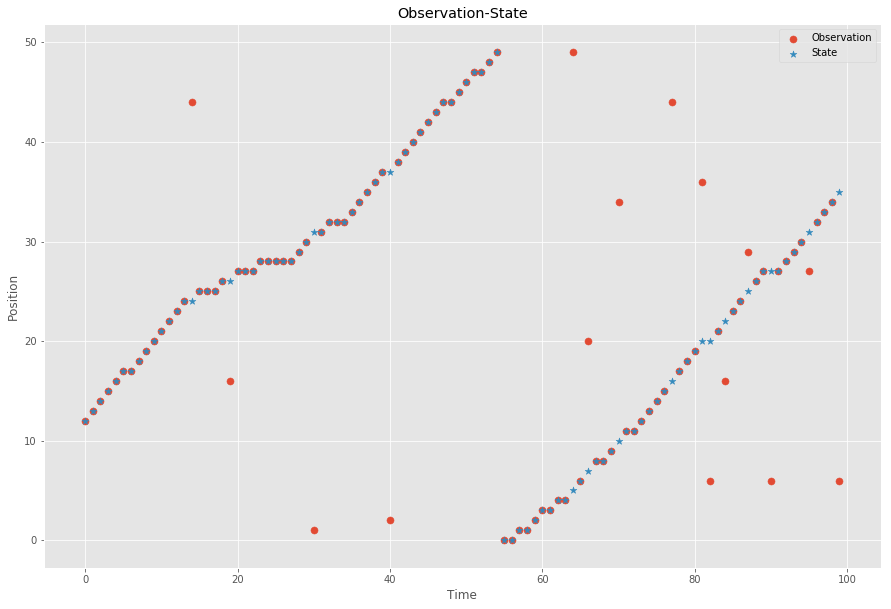

In [14]:
fig = plt.figure(1, figsize=(15, 10))
plt.scatter(np.arange(100),obs,label='Observation',s=50,marker='o')
plt.scatter(np.arange(100),state,label='State',marker='*',s=50)
plt.legend()
plt.xlabel("Time")
plt.ylabel("Position")
plt.title("Observation-State")
plt.legend()
plt.show()

<div class="alert alert-info" role="alert">
<b> Graph interpretation :</b> After doing the simulation, we can see on this the graph miss predicted some true positions. <br>
The red points should have followed the bleu dots all through the plot.  <br>
</div>

### 5. Implement the Forward-Backward algorithm for computing the quantities defined in 3-a,b,f. (Attention: becareful with numerical stability! Modify the log-sum-exp trick for this algorithm)

In [15]:
#We define the different initializations :
K=100
N=50
eps=0.3
w=0.8

#Now we generate the different matrixs :
Trans_matrix,Obs_matrix,prior=generate_matrix(N,epsilon=eps,w=w)

In [16]:
def forward_backward(K,N,eps,Trans_matrix,Obs_matrix,prior):
    
    #Initialization for the algorithms :
    
    
    y,state=hmm_generate_data(K,N,eps,w,Trans_matrix,Obs_matrix,prior) 
    log_alpha=np.zeros([N,K])
    log_alpha_predict=np.zeros([N,K])
    log_beta=np.zeros([N,K])
    log_beta_postdict=np.zeros([N,K])
  

    #Forward :    

    for k in range(K):
        if (k==0):
            log_alpha_predict[:,k]=np.log(prior)
        else:

            log_alpha_predict[:,k]=state_predict(Trans_matrix,log_alpha[:,k-1])

    
        log_alpha[:,k]=state_update(Obs_matrix[int(y[k]),:],log_alpha_predict[:,k])
    

    # Backward :

    for t in range (K-1,-1,-1):    

        if (t==K-1):
            log_beta_postdict[:,t]=np.zeros(N)
        else:
            log_beta_postdict[:,t]=state_postdict(Trans_matrix,log_beta[:,t+1])

        log_beta[:,t]=state_update(Obs_matrix[int(y[t]),:],log_beta_postdict[:,t])

    return log_alpha,log_alpha_predict,log_beta,log_beta_postdict  

In [17]:
#State prediction :

def state_predict(Trans_matrix,log_p):
    mx=max(log_p)
    p=np.exp(log_p-mx)
    lap=np.log(Trans_matrix.dot(p))+mx
    return lap

In [18]:
#State update :

def state_update(obs,log_p):
    return np.log(obs)+log_p

In [19]:
#State postdict

def state_postdict(Trans_matrix,log_p):
    mx=max(log_p)
    p=np.exp(log_p-mx)
    lap=np.log(Trans_matrix.T.dot(p))+mx
    return lap



<b>p3a : Distribution of the robot's current position given the observations so far: </b>

The expression of the probability : <br>
$p3a = P(X_k|Y_{1:k})= \frac{P(X_k,Y_{1:k})}{P(Y_{1:k})}=\frac{P(X_k,Y_{1:k})}{\sum\nolimits_{X_k}P(X_k,Y_{1:k})}=\frac{\alpha_{k,k}(X_k)}{\sum\limits_{i=1}^k \alpha_{i,i}(X_i) } $</br>

<p>
<b> p3b : The Distribution of the robot's position at time step k given all the observations is given by : </b>

</br> 

$p3b = P(X_k|Y_{1:K})= \frac{P(X_k,Y_{1:K})}{P(Y_{1:K})}=\frac{P(X_k,Y_{1:k}).P(Y_{k+1:K}|X_k,Y_{1:k})}{P(Y_{1:K})} $

but we know that $y_{k+1:K} \perp  y_{1:k} | X_{k}$ so : <br>

$P(X_k|Y_{1:K})=\frac{P(X_k,Y_{1:k}).P(Y_{k+1:K}|X_k)}{P(Y_{1:K})}=\frac{\gamma_{k,k}(X_k)}{\sum\nolimits_{X_k} \gamma_{k,k}(X_k) }$

</br>

With:
$\gamma_{k,k}(X_k)=\alpha_{k/k}(X_k).\beta_{k/k+1}(X_k) $

</p>
</div>

In [20]:
def calcul_prob(K,N,eps,Trans_matrix,Obs_matrix,prior):
    
    p3a=np.zeros([N,K])
    p3b=np.zeros([N,K])
# Generating the forward_backward algorithm :
    log_alpha,log_alpha_predict,log_beta,log_beta_postdict=forward_backward(K,N,eps,Trans_matrix,Obs_matrix,prior)
    log_gamma=log_alpha+log_beta_postdict
    
    for k in range(K): 
# Distribution of the robot's current position given the observations so far : 
        p3a[:,k]=np.exp(log_alpha[:,k]-log_sum_exp(log_alpha[:,k]))
    
# Distribution of the robot's position at time step k given all the observations :            
        p3b[:,k]=np.exp(log_gamma[:,k]-log_sum_exp(log_gamma[:,k]))
    
# Most likely current position of the robot given the observations so far :
    most_likely_pos=[np.argmax(p3a[:,k]) for k in range(K)]
    
    return p3a,p3b,most_likely_pos

In [21]:
log_alpha,log_alpha_predict,log_beta,log_beta_postdict=forward_backward(K,N,eps,Trans_matrix,Obs_matrix,prior)
p3a,p3b,most_likely_pos=calcul_prob(K,N,eps,Trans_matrix,Obs_matrix,prior)

In [22]:
print("Question 3.a : Distribution of the robot's current position given the observations so far : ")
print(p3a)

Question 3.a : Distribution of the robot's current position given the observations so far : 
[[4.00000000e-03 3.51493849e-05 2.50234595e-07 ... 6.99212961e-12
  9.97857143e-01 2.13826531e-03]
 [4.00000000e-03 3.51493849e-05 2.50234595e-07 ... 1.65211195e-23
  3.47867145e-14 9.97857143e-01]
 [4.00000000e-03 3.51493849e-05 2.50234595e-07 ... 1.17499488e-32
  8.21946246e-26 1.73068231e-16]
 ...
 [4.00000000e-03 3.51493849e-05 2.50234595e-07 ... 4.58199155e-06
  9.81854159e-09 2.10396945e-11]
 [4.00000000e-03 3.51493849e-05 2.50234595e-07 ... 2.13826530e-03
  4.58199704e-06 9.81856498e-09]
 [4.00000000e-03 3.51493849e-05 2.50234595e-07 ... 9.97857143e-01
  2.13826531e-03 4.58199708e-06]]


In [23]:
print("Question 3.b : Distribution of the robot's current position given all the observations : ")
print(p3b)

Question 3.b : Distribution of the robot's current position given all the observations : 
[[1.46272279e-63 4.56190862e-63 1.41951134e-62 ... 3.01809803e-12
  9.99984770e-01 2.13826531e-03]
 [4.16948753e-65 1.34500299e-64 4.33392277e-64 ... 1.58564105e-26
  1.50816602e-14 9.97857143e-01]
 [5.76336948e-67 1.92112219e-66 6.40373754e-66 ... 5.93536974e-37
  5.84183544e-28 1.73068231e-16]
 ...
 [2.15102603e-57 6.71970041e-57 2.09947985e-56 ... 2.31454745e-10
  6.97835223e-11 2.10396945e-11]
 [6.16584837e-59 1.93022729e-58 6.01801213e-58 ... 1.08012345e-07
  3.25657217e-08 9.81856498e-09]
 [1.61104980e-60 5.35952154e-60 1.78319499e-59 ... 9.99999892e-01
  1.51973369e-05 4.58199708e-06]]


In [24]:
print("Question 3.f : Most likely current position of the robot given the observations so far : ")
print(most_likely_pos)

Question 3.f : Most likely current position of the robot given the observations so far : 
[26, 27, 28, 29, 29, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 39, 40, 41, 41, 42, 42, 43, 44, 45, 46, 47, 48, 49, 0, 0, 2, 2, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 11, 12, 13, 14, 14, 14, 14, 15, 16, 16, 17, 17, 18, 19, 20, 21, 22, 22, 23, 24, 24, 25, 26, 26, 27, 28, 28, 29, 28, 29, 30, 30, 31, 32, 33, 34, 34, 35, 36, 37, 38, 39, 40, 40, 41, 42, 43, 44, 45, 45, 46, 47, 48, 49, 0, 1]


### 6.Assume now that at each step the robot can be kidnapped with probability κ. If the robot is kidnapped its new position is independent from its previous position and is uniformly distributed. Repeat 4 and 5 for this new model with κ = 0.1. Can you reuse your code?


For this question, a probability k is introduced as the probability that the robot gets kidnapped at each step t

</br>

The transition model is $x_k \sim p(x_k |x_{k-1})$ will change . It will become <br>
$$\quad
P(X_{t+1}|X_{t})=
\begin{bmatrix} 
(1-k).\epsilon+\frac{k}{N} & (1-k).(1-\epsilon)+\frac{k}{N} & \frac{k}{N} & . & . & . & (1-k)(1-\epsilon)+\frac{k}{N} \\
 \frac{k}{N} & (1-k).\epsilon+\frac{k}{N} & (1-k).(1-\epsilon)+\frac{k}{N} & . & . & \frac{k}{N} \\
. & . &.&.&.&.&.\\
. & . &.&.&.&.&.\\
. & . &.&.&.&.&.\\
(1-k).(1-\epsilon)+\frac{k}{N} & . &.&.&\frac{k}{N}& \frac{k}{N} &(1-k).\epsilon+\frac{k}{N}
\end{bmatrix}$$=$$\quad
P(X_{t+1}|X_{t})=(1-k)*
\begin{bmatrix} 
\epsilon & 0 & 0 & . & . & . & 1-\epsilon \\
1-\epsilon & \epsilon & 0 & . & . & . & 0 \\
0 & 1-\epsilon & \epsilon & 0 & . & . & 0 \\
0 & 0 &1-\epsilon & \epsilon  & . & . & 0\\
. & . &.&.&.&.&.\\
. & . &.&.&.&.&.\\
. & . &.&.&.&.&.\\
0 & . &.&.&0&1-\epsilon&\epsilon
\end{bmatrix}+\frac{k}{N}*\begin{bmatrix} 
1 & 1 & 1 & . & . & . & 1 \\
1 & 1 & 1 & . & . & . & 1 \\
1 & 1 & 1 & . & . & . & 1 \\
1 & 1 & 1 & . & . & . & 1 \\
. & . &.&.&.&.&.\\
. & . &.&.&.&.&.\\
. & . &.&.&.&.&.\\
1 & 1 & 1 & . & . & . & 1 \\
\end{bmatrix}
$$
<br>
<br>

The observation model  $y_k \sim p(y_k |x_{k})$  remains the same.
    <p>
    $p(Y_{k}/X_{k})= w
    \begin{bmatrix}
            1       & 0 & 0 & \dots & 0 \\
            0       & 1 & 0 & \dots & 0 \\
            \dots       & \dots & \ddots & \dots & \dots \\
            \dots       & \dots & \dots & \ddots & \dots \\
            0       & 0 & 0 & \dots & 1
        \end{bmatrix} 
        + \frac{1-w}{N} 
        \begin{bmatrix}
            1       & 1 & 1 & \dots & 1 \\
            1       & 1 & 1 & \dots & 1 \\
            \dots       & \ddots & \dots & \dots & \dots \\
            \dots       & \dots & \ddots & \dots & \dots \\
            1       & 1 & \dots & 1 & 1
        \end{bmatrix} 
        $
   </p>  
</div>


<b>Explanation :</b> If the robot gets not kidnapped, we find ourselves in the 'normal' case, which was explained in the 2nd question.
On the other hand, if the robot gets kidnapped with probability k, and since we have N states, the robot can change his state with probability $\frac{1}{N}$.

<b> Conclusion : We can still use the same code,we just need to change the transitition matrix, like explained above.</b>

</div>

In [25]:
def generate_matrix_kinnaped(N,epsilon=eps,k=0.1,w=w):
    Transition=generate_matrix(N,epsilon,w)[0]
    Transition_kidnapped=(1-k)*Transition+(k)/N*np.ones((N,N))
    ObsMatrix_kidnapped=w*np.eye(N)+(1-w)/N*np.ones((N,N))
    prior_knp=np.ones(N)/N
    return Transition_kidnapped,ObsMatrix_kidnapped,prior_knp


In [26]:
Trans_matrix_knp,Obsmatrix_knp,prior_knp=generate_matrix_kinnaped(N=N,epsilon=eps,k=0.1,w=w)

In [27]:
obs_knp,state_knp=hmm_generate_data(K,N,eps,w,Trans_matrix_knp,Obsmatrix_knp,prior_knp)

In [28]:
for i in range(K):
    print("Step number : "+str(i+1))
    print('\nTrue position :'+str(state_knp[i]))
    print('Observed position :'+str(int(obs_knp[i])))
    print('\n************************************************************************\n')

Step number : 1

True position :3
Observed position :3

************************************************************************

Step number : 2

True position :3
Observed position :3

************************************************************************

Step number : 3

True position :3
Observed position :3

************************************************************************

Step number : 4

True position :4
Observed position :4

************************************************************************

Step number : 5

True position :5
Observed position :5

************************************************************************

Step number : 6

True position :5
Observed position :5

************************************************************************

Step number : 7

True position :6
Observed position :6

************************************************************************

Step number : 8

True position :7
Observed position :7

**********************************

In [29]:
log_alpha_knp,log_alpha_predict_knp,log_beta_knp,log_beta_postdict_knp=forward_backward(K,N,eps,Trans_matrix_knp,Obsmatrix_knp,prior_knp)
p3a,p3b,most_likely_pos=calcul_prob(K,N,eps,Trans_matrix_knp,Obsmatrix_knp,prior_knp)

In [30]:
print("the distribution of themost likely position of the robot given the observations so far is ") 
print( most_likely_pos)

the distribution of themost likely position of the robot given the observations so far is 
[2, 48, 2, 2, 2, 2, 3, 4, 5, 6, 6, 7, 8, 9, 46, 34, 2, 3, 4, 4, 5, 6, 7, 6, 7, 7, 8, 8, 8, 8, 9, 10, 11, 12, 12, 13, 14, 15, 16, 17, 17, 17, 18, 19, 11, 48, 12, 13, 13, 14, 15, 16, 17, 18, 19, 20, 21, 21, 22, 30, 31, 31, 32, 43, 43, 44, 42, 42, 43, 44, 45, 46, 47, 48, 49, 0, 0, 1, 2, 2, 3, 4, 5, 5, 6, 7, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 16, 17, 18, 19]


In [32]:
errors_count2 = state_knp - obs_knp
errors2 = 0
for i in range(K):
    if (errors_count2[i] != 0):
        errors2 = errors2 + 1
print('The error rate for this simulation ( With kidnapping ) is : '+ str((errors2*100/K)) +'%')

The error rate for this simulation ( With kidnapping ) is : 13%


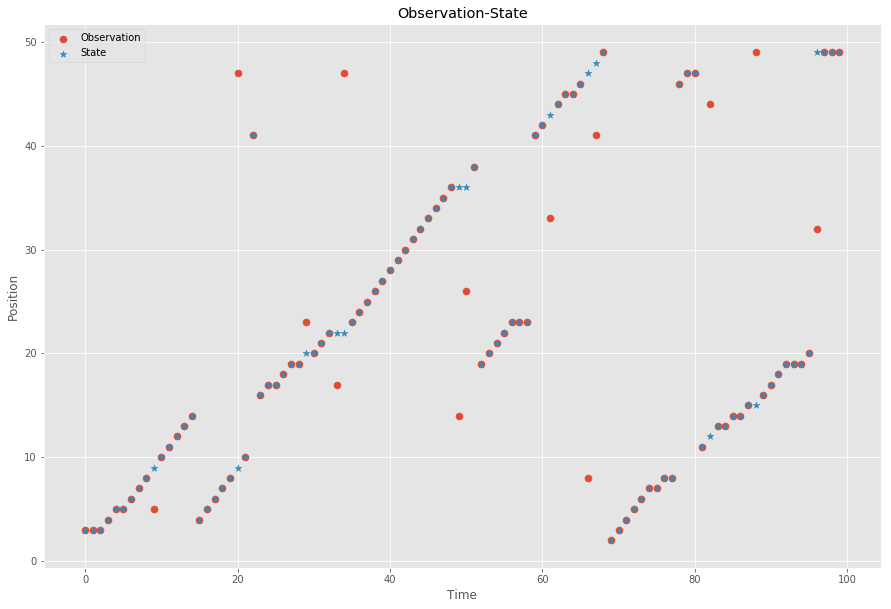

In [33]:
fig = plt.figure(1, figsize=(15, 10))
plt.scatter(np.arange(K),obs_knp,label='Observation',s=50,marker='o')
plt.scatter(np.arange(K),state_knp,label='State',marker='*',s=50)
plt.legend()
plt.xlabel("Time")
plt.ylabel("Position")
plt.title("Observation-State")
plt.legend()
plt.show()


<b> Graph interpretation :</b> After doing the simulation, we can also see on this the graph miss predicted some true positions. <br>
We can also notice the jumps that the robot made with probability equal to k, and thus, we do not have a monotonic lines in the graph like on the 4th question example..  <br>
</div>